In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold

data_dir = 'D:\Computer Vision & Pattern Regocnition\Animals'
images, labels = [], []

for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is not None:
                img_resized = cv2.resize(img, (64, 64))  # Resize to 64x64
                images.append(img_resized)
                labels.append(class_dir)

images = np.array(images)
labels = np.array(labels)


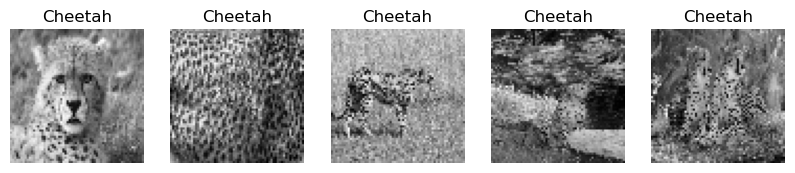

In [24]:
import matplotlib.pyplot as plt

# Display the first 5 images
plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')  # Display in grayscale
    plt.title(labels[i])
    plt.axis('off')

plt.show()


In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [27]:
from collections import Counter
import matplotlib.pyplot as plt

def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def k_nearest_neighbors(train_images, train_labels, test_image, K):
    distances = [(euclidean_distance(test_image, train_img), label) 
                 for train_img, label in zip(train_images, train_labels)]
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest = [label for _, label in sorted_distances[:K]]
    return Counter(k_nearest).most_common(1)[0][0]

k_values = range(1, 31)
accuracy_results = []

for K in k_values:
    fold_accuracies = []
    for train_idx, test_idx in kf.split(images):
        train_images, test_images = images[train_idx], images[test_idx]
        train_labels, test_labels = labels[train_idx], labels[test_idx]
        correct_predictions = 0

        for img, true_label in zip(test_images, test_labels):
            predicted_label = k_nearest_neighbors(train_images, train_labels, img, K)
            if predicted_label == true_label:
                correct_predictions += 1

        fold_accuracy = correct_predictions / len(test_labels)
        fold_accuracies.append(fold_accuracy)
    
    average_accuracy = np.mean(fold_accuracies)
    accuracy_results.append(average_accuracy)
    print(average_accuracy)


0.2705882352941177
0.2705882352941177
0.24117647058823527
0.24705882352941178
0.24117647058823527
0.23529411764705882
0.24117647058823527
0.2352941176470588
0.22941176470588237
0.22941176470588234
0.2235294117647059
0.2647058823529412
0.23529411764705882
0.23529411764705882
0.24117647058823533
0.2176470588235294
0.24117647058823527
0.22941176470588237
0.26470588235294124
0.24117647058823533
0.23529411764705882
0.21764705882352944
0.21176470588235294
0.2
0.21176470588235294
0.2176470588235294
0.21176470588235294
0.21176470588235294
0.19411764705882353
0.21176470588235294


In [28]:
centroids = np.mean(accuracy_results, axis=0)
print(centroids)

0.23196078431372552


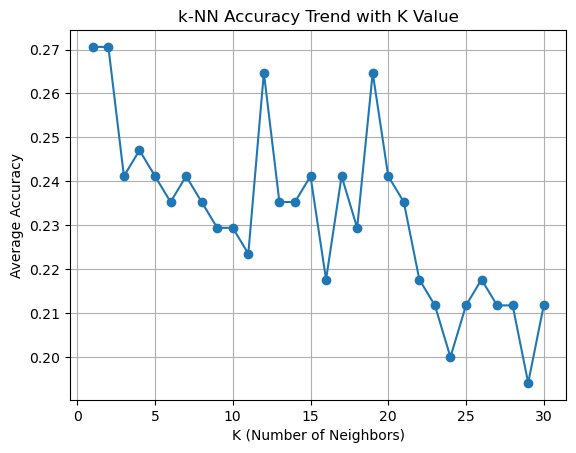

In [29]:
plt.plot(k_values, accuracy_results, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title('k-NN Accuracy Trend with K Value')
plt.grid(True)
plt.show()